In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv

--2025-03-26 21:50:55--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv [following]
--2025-03-26 21:50:55--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘framingham.csv’

framingham.csv      100%[===================>] 191.36K  --.-KB/s    in 0.02s   

2025-03-26 21:50:55 (9.27 MB/s) - ‘framingham.csv’ save

## LOGISTIC REGRESSION - HEART DISEASE PREDICTION

###Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

###Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

###Demographic:
    • Sex: male or female(Nominal)
    • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Behavioral
    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
###Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)
###Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous)
    Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Cargar Datos

In [11]:
import pandas as pd
import numpy as np
data = pd.read_csv("framingham.csv")

In [3]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Descriptiva

#### Cuantos datos tiene la tabla

In [4]:
data.shape[0]


4238

#### Medidas de tendencia central de las variables.

In [5]:
import pandas as pd
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
data = pd.read_csv("framingham.csv")
data.shape[0]


--2025-03-26 21:55:59--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv [following]
--2025-03-26 21:55:59--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘framingham.csv.1’

framingham.csv.1    100%[===================>] 191.36K  --.-KB/s    in 0.02s   

2025-03-26 21:55:59 (7.78 MB/s) - ‘framingham.csv.1’ 

4238

#### Grafico de Barras con el número de hombres y mujeres

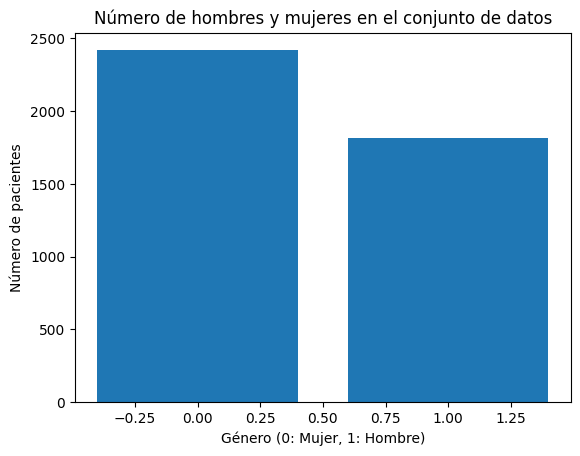

In [6]:
import matplotlib.pyplot as plt

gender_counts = data['male'].value_counts()

plt.bar(gender_counts.index, gender_counts.values)

plt.xlabel('Género (0: Mujer, 1: Hombre)')
plt.ylabel('Número de pacientes')
plt.title('Número de hombres y mujeres en el conjunto de datos')

plt.show()


#### Realice un ggrafico de Barras de TenYearCHD

*   Elemento de lista
*   Elemento de lista



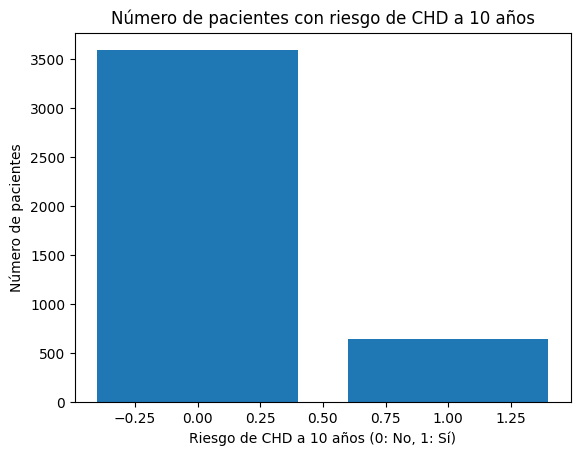

In [7]:
tenyear_counts = data['TenYearCHD'].value_counts()

plt.bar(tenyear_counts.index, tenyear_counts.values)

plt.xlabel('Riesgo de CHD a 10 años (0: No, 1: Sí)')
plt.ylabel('Número de pacientes')
plt.title('Número de pacientes con riesgo de CHD a 10 años')

plt.show()


#### Realice un grafico de densidad del BMI

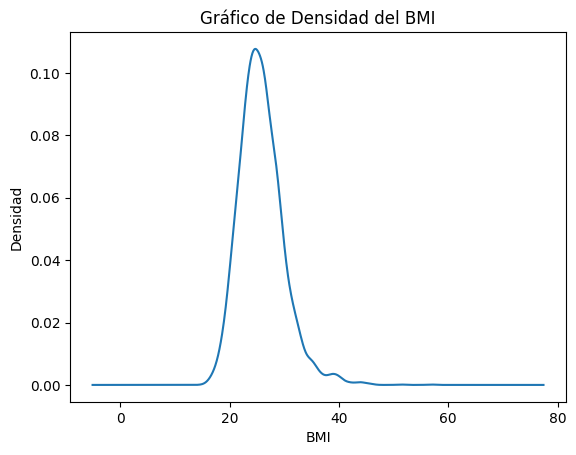

In [8]:
data['BMI'].plot.kde()
plt.xlabel('BMI')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad del BMI')
plt.show()


#### Realice un grafico de densidad del BMI que diferencie entre hombres y mujeres, ¿Cual tiene en promedio mayor BMI?

<ipython-input-9-1f02cefffe33>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[data['male'] == 0, 'BMI'], label='Mujeres', shade=True)
<ipython-input-9-1f02cefffe33>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[data['male'] == 1, 'BMI'], label='Hombres', shade=True)


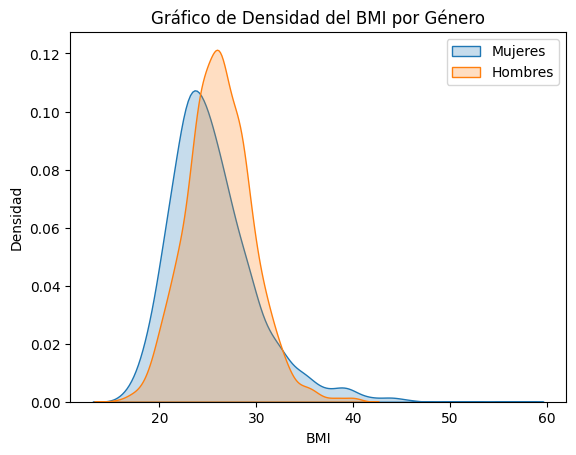

BMI promedio de mujeres: 25.51
BMI promedio de hombres: 26.19
Los hombres tienen un BMI promedio mayor.


In [9]:
import seaborn as sns
sns.kdeplot(data.loc[data['male'] == 0, 'BMI'], label='Mujeres', shade=True)
sns.kdeplot(data.loc[data['male'] == 1, 'BMI'], label='Hombres', shade=True)
plt.xlabel('BMI')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad del BMI por Género')
plt.legend()
plt.show()
bmi_promedio_mujeres = data.loc[data['male'] == 0, 'BMI'].mean()
bmi_promedio_hombres = data.loc[data['male'] == 1, 'BMI'].mean()

print(f"BMI promedio de mujeres: {bmi_promedio_mujeres:.2f}")
print(f"BMI promedio de hombres: {bmi_promedio_hombres:.2f}")


if bmi_promedio_mujeres > bmi_promedio_hombres:
  print("Las mujeres tienen un BMI promedio mayor.")
else:
  print("Los hombres tienen un BMI promedio mayor.")


#### Realice un mapa de calor entre las variables (heatmap) y diga cual es el par de variables más correlacionadas. Recuerde que para sacar la correlacion puede usar data.corr()

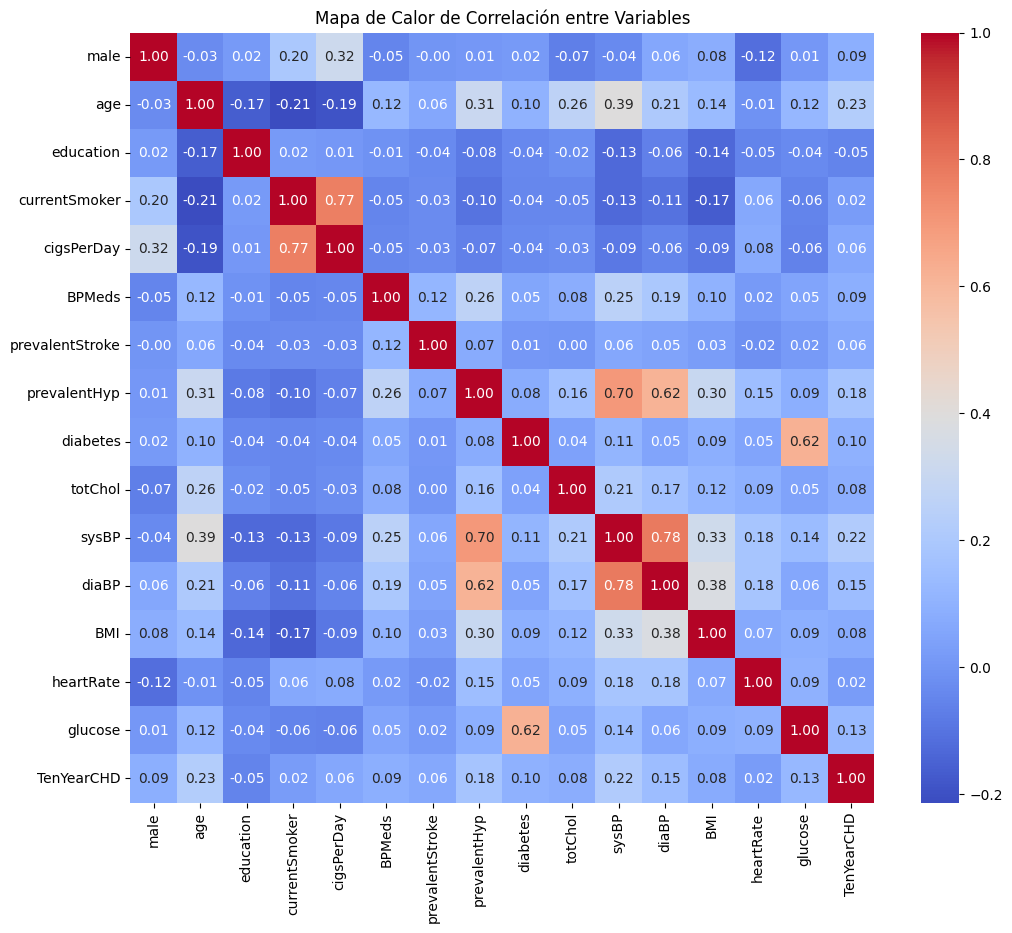

El par de variables más correlacionadas es: sysBP y diaBP
Con un valor de correlación de: 0.7840020914320167


In [12]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()


correlation_matrix = correlation_matrix.abs()  # Valor absoluto de la correlación
correlation_matrix.values[np.diag_indices_from(correlation_matrix)] = 0  # Ignorar la correlación con sí misma
max_correlation = np.max(correlation_matrix)
row, col = np.where(correlation_matrix == max_correlation)
variable1 = correlation_matrix.index[row[0]]
variable2 = correlation_matrix.columns[col[0]]

print(f"El par de variables más correlacionadas es: {variable1} y {variable2}")
print(f"Con un valor de correlación de: {max_correlation}")


¿Haga un boxplot por genero para cada una de estas tres variables :BMI,	heartRate y	glucose.¿hay outliers ?

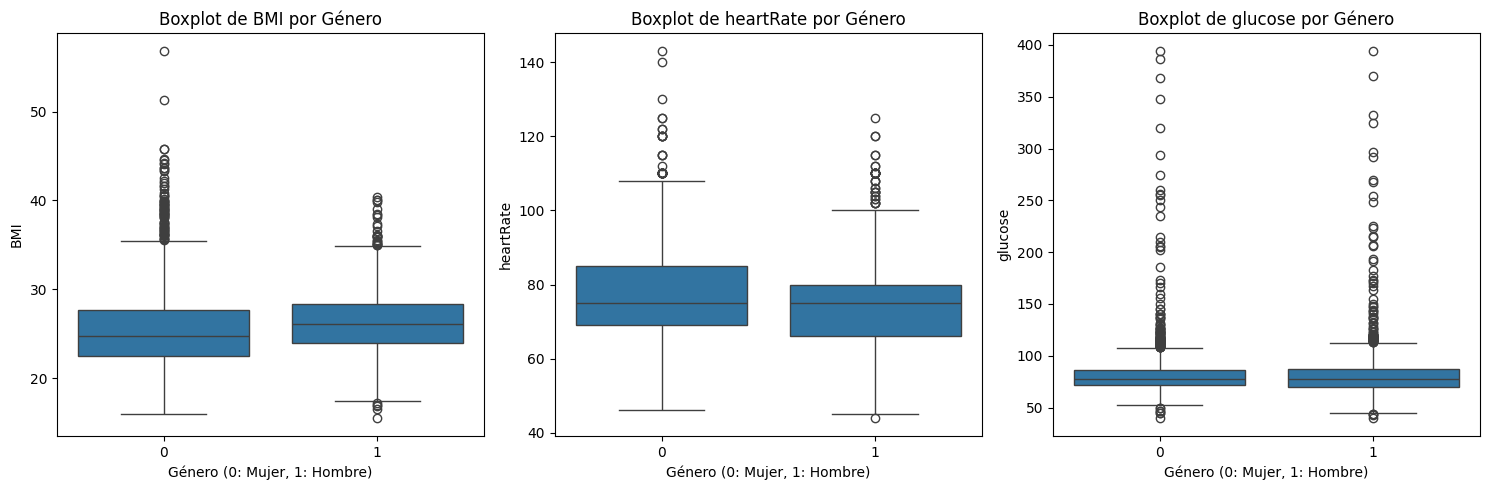

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot para BMI por género
sns.boxplot(x='male', y='BMI', data=data, ax=axes[0])
axes[0].set_title('Boxplot de BMI por Género')
axes[0].set_xlabel('Género (0: Mujer, 1: Hombre)')
axes[0].set_ylabel('BMI')

# Boxplot para heartRate por género
sns.boxplot(x='male', y='heartRate', data=data, ax=axes[1])
axes[1].set_title('Boxplot de heartRate por Género')
axes[1].set_xlabel('Género (0: Mujer, 1: Hombre)')
axes[1].set_ylabel('heartRate')

# Boxplot para glucose por género
sns.boxplot(x='male', y='glucose', data=data, ax=axes[2])
axes[2].set_title('Boxplot de glucose por Género')
axes[2].set_xlabel('Género (0: Mujer, 1: Hombre)')
axes[2].set_ylabel('glucose')

plt.tight_layout()
plt.show()




In [14]:
# Calcular IQR para BMI por género
for gender in [0, 1]:
    bmi_data = data[data['male'] == gender]['BMI']
    q1 = bmi_data.quantile(0.25)
    q3 = bmi_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_bmi = bmi_data[(bmi_data < lower_bound) | (bmi_data > upper_bound)]
    print(f"Outliers de BMI para género {gender}: {outliers_bmi.values}")

# Calcular IQR para heartRate por género
for gender in [0, 1]:
    heartrate_data = data[data['male'] == gender]['heartRate']
    q1 = heartrate_data.quantile(0.25)
    q3 = heartrate_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_heartrate = heartrate_data[(heartrate_data < lower_bound) | (heartrate_data > upper_bound)]
    print(f"Outliers de heartRate para género {gender}: {outliers_heartrate.values}")

# Calcular IQR para glucose por género
for gender in [0, 1]:
    glucose_data = data[data['male'] == gender]['glucose']
    q1 = glucose_data.quantile(0.25)
    q3 = glucose_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_glucose = glucose_data[(glucose_data < lower_bound) | (glucose_data > upper_bound)]
    print(f"Outliers de glucose para género {gender}: {outliers_glucose.values}")


Outliers de BMI para género 0: [45.8  38.46 40.52 42.15 36.81 38.39 42.   44.27 36.29 35.58 36.11 45.79
 38.82 37.41 36.62 37.48 39.6  44.09 40.58 43.3  43.69 42.53 36.21 38.88
 38.38 35.99 38.75 44.55 39.64 36.46 38.06 35.78 39.91 38.43 37.04 44.71
 38.54 39.53 39.54 35.62 43.48 36.91 39.08 39.69 36.65 39.82 36.79 37.02
 36.54 56.8  38.11 40.21 39.4  40.81 38.61 39.21 40.51 38.31 35.68 37.1
 38.96 39.94 39.94 39.22 41.29 36.12 36.18 41.61 37.62 37.58 51.28 38.94
 37.3  41.66 38.17 36.07 39.17 43.67]
Outliers de BMI para género 1: [38.53 40.11 38.14 15.54 39.88 36.12 16.59 16.87 34.99 36.52 35.45 35.11
 35.2  35.85 35.85 36.04 39.04 38.42 35.96 35.53 37.38 16.98 37.15 35.12
 17.17 36.01 35.31 40.08 34.97 40.38]
Outliers de heartRate para género 0: [110. 110. 140. 130. 110. 110. 110. 110. 110. 110. 110. 112. 110. 110.
 110. 110. 110. 110. 122. 110. 110. 110. 120. 120. 120. 110. 143. 110.
 120. 110. 115. 110. 115. 120. 110. 115. 110. 122. 110. 110. 125. 125.]
Outliers de heartRate para g

### Manipulación de Datos

#### De cada variable cuente cuantos datos nulos hay

In [15]:
null_counts = data.isnull().sum()
null_counts


,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


#### Utilice dropna para borrar los datos faltantes ¿cuantos datos quedan ?

In [16]:
data_cleaned = data.dropna()
print(f"Después de borrar los datos faltantes, quedan {data_cleaned.shape[0]} datos.")


Después de borrar los datos faltantes, quedan 3656 datos.


#### Seleccione sus variables X y su variable y

In [17]:

X = data_cleaned[['age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
                 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
                 'heartRate', 'glucose', 'male']]
y = data_cleaned['TenYearCHD']


#### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
1. ¿De que tamaño queda cada dataset?

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(f"Tamaño del dataset de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del dataset de prueba: {X_test.shape[0]}")

Tamaño del dataset de entrenamiento: 2559
Tamaño del dataset de prueba: 1097


#### Entrene el modelo de Regresion logistica usando datos de entrenamiento

In [19]:
from sklearn.linear_model import LogisticRegression

# Crear un modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo usando los datos de entrenamiento
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca

In [20]:
# Imprimir los coeficientes del modelo
coefficients = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_[0]})
print(coefficients)

# Encontrar el coeficiente con mayor magnitud (efecto mayor)
max_coefficient_variable = coefficients.loc[coefficients['Coeficiente'].abs().idxmax(), 'Variable']
max_coefficient_value = coefficients.loc[coefficients['Coeficiente'].abs().idxmax(), 'Coeficiente']

print(f"\nLa variable con mayor efecto sobre desarrollar una enfermedad cardiaca es: {max_coefficient_variable}")
print(f"Con un coeficiente de: {max_coefficient_value}")


           Variable  Coeficiente
0               age     0.032053
1     currentSmoker    -0.232065
2        cigsPerDay     0.026143
3            BPMeds     0.115090
4   prevalentStroke     0.088608
5      prevalentHyp     0.820858
6          diabetes     0.159417
7           totChol    -0.001152
8             sysBP     0.014428
9             diaBP    -0.029732
10              BMI    -0.041632
11        heartRate    -0.027791
12          glucose     0.004231
13             male     0.413240

La variable con mayor efecto sobre desarrollar una enfermedad cardiaca es: prevalentHyp
Con un coeficiente de: 0.8208580210227995


#### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión (Accuracy):", accuracy)

# Calcular el recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcular la precisión (precision)
precision = precision_score(y_test, y_pred)
print("Precisión (Precision):", precision)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


Matriz de Confusión:
 [[915   3]
 [175   4]]
Precisión (Accuracy): 0.837739288969918
Recall: 0.0223463687150838
Precisión (Precision): 0.5714285714285714
F1-score: 0.043010752688172046


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

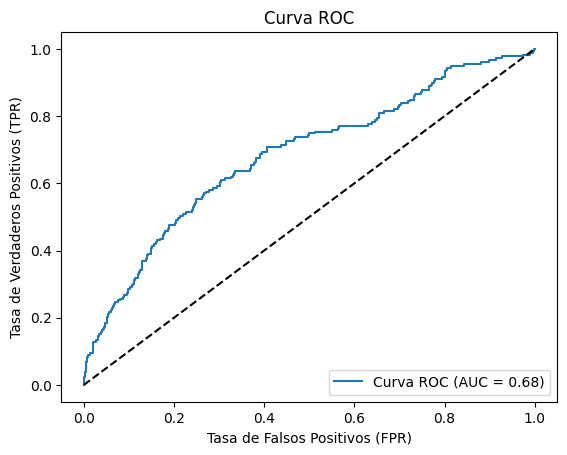

El valor del AUC es: 0.6835420698384879


In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades de predicción para la clase positiva (TenYearCHD = 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

print(f"El valor del AUC es: {auc}")

In [ ]:
# En este caso, el AUC es [0,6835].
# Esto indica que el modelo de regresión logística tiene un buen poder predictivo para distinguir entre los pacientes
# con riesgo de enfermedad cardíaca a 10 años y los que no tienen riesgo.
# Un AUC de [0,6835] significa que el modelo es capaz de clasificar correctamente
# a una proporción significativa de pacientes con y sin riesgo de enfermedad cardíaca.

## Corrección desbalance de clases
1. Busque la funcion train_test_split en su codigo y agregue la opcion stratify  = y . Por que esto ayudaría con el desblance?
2. usando from imblearn.over_sampling import SMOTE mejore el performance
 3. Saque todo el modelo y la matriz y la grafica de ROC AUC

Tamaño del dataset de entrenamiento: 2559
Tamaño del dataset de prueba: 1097
           Variable  Coeficiente
0               age     0.044712
1     currentSmoker    -0.962897
2        cigsPerDay     0.061891
3            BPMeds     0.268072
4   prevalentStroke    -0.039159
5      prevalentHyp     0.273706
6          diabetes     0.090425
7           totChol    -0.000678
8             sysBP     0.012049
9             diaBP    -0.011365
10              BMI    -0.023700
11        heartRate    -0.027299
12          glucose     0.003852
13             male    -0.711644

La variable con mayor efecto sobre desarrollar una enfermedad cardiaca es: currentSmoker
Con un coeficiente de: -0.9628972208823942
Matriz de Confusión:
 [[578 352]
 [ 77  90]]
Precisión (Accuracy): 0.6089334548769371
Recall: 0.5389221556886228
Precisión (Precision): 0.20361990950226244
F1-score: 0.2955665024630542


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


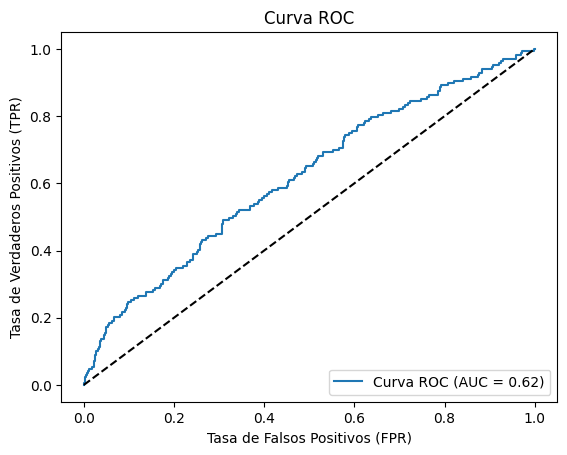

El valor del AUC es: 0.61726224969416


In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

# 1. ¿De que tamaño queda cada dataset?

# Agregar stratify=y para mantener la proporción de clases en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

print(f"Tamaño del dataset de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del dataset de prueba: {X_test.shape[0]}")

# #### Entrene el modelo de Regresion logistica usando datos de entrenamiento

# Aplicar SMOTE para corregir el desbalance de clases
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Crear un modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo usando los datos de entrenamiento con SMOTE
model.fit(X_train_smote, y_train_smote)

# #### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca
# Imprimir los coeficientes del modelo
coefficients = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_[0]})
print(coefficients)

# Encontrar el coeficiente con mayor magnitud (efecto mayor)
max_coefficient_variable = coefficients.loc[coefficients['Coeficiente'].abs().idxmax(), 'Variable']
max_coefficient_value = coefficients.loc[coefficients['Coeficiente'].abs().idxmax(), 'Coeficiente']

print(f"\nLa variable con mayor efecto sobre desarrollar una enfermedad cardiaca es: {max_coefficient_variable}")
print(f"Con un coeficiente de: {max_coefficient_value}")

# #### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión (Accuracy):", accuracy)

# Calcular el recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcular la precisión (precision)
precision = precision_score(y_test, y_pred)
print("Precisión (Precision):", precision)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

%matplotlib inline
# #### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

# Obtener las probabilidades de predicción para la clase positiva (TenYearCHD = 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

print(f"El valor del AUC es: {auc}")

## Pinter el resultado con SMOTE y sin SMOTE

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model without SMOTE:
Confusion Matrix:
 [[915   3]
 [175   4]]
Accuracy: 0.837739288969918
Recall: 0.0223463687150838
Precision: 0.5714285714285714
F1-score: 0.043010752688172046


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model with SMOTE:
Confusion Matrix:
 [[578 352]
 [ 77  90]]
Accuracy: 0.6089334548769371
Recall: 0.5389221556886228
Precision: 0.20361990950226244
F1-score: 0.2955665024630542


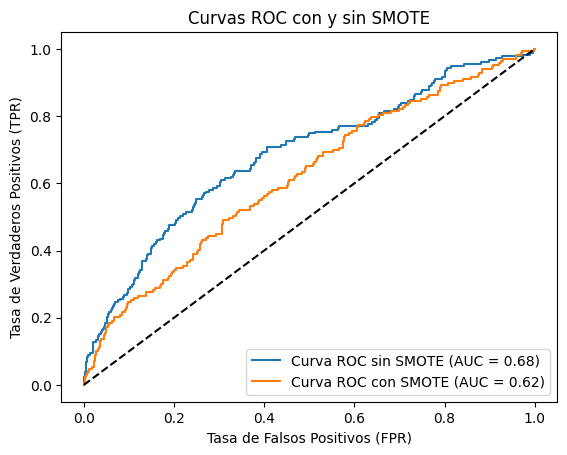

In [25]:

# Model without SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
model_no_smote = LogisticRegression()
model_no_smote.fit(X_train, y_train)
y_pred_no_smote = model_no_smote.predict(X_test)

# Evaluate model without SMOTE
print("Model without SMOTE:")
cm_no_smote = confusion_matrix(y_test, y_pred_no_smote)
print("Confusion Matrix:\n", cm_no_smote)
accuracy_no_smote = accuracy_score(y_test, y_pred_no_smote)
print("Accuracy:", accuracy_no_smote)
recall_no_smote = recall_score(y_test, y_pred_no_smote)
print("Recall:", recall_no_smote)
precision_no_smote = precision_score(y_test, y_pred_no_smote)
print("Precision:", precision_no_smote)
f1_no_smote = f1_score(y_test, y_pred_no_smote)
print("F1-score:", f1_no_smote)

y_pred_proba_no_smote = model_no_smote.predict_proba(X_test)[:, 1]
fpr_no_smote, tpr_no_smote, thresholds_no_smote = roc_curve(y_test, y_pred_proba_no_smote)
auc_no_smote = roc_auc_score(y_test, y_pred_proba_no_smote)
plt.plot(fpr_no_smote, tpr_no_smote, label='Curva ROC sin SMOTE (AUC = %0.2f)' % auc_no_smote)

# Model with SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)

# Evaluate model with SMOTE
print("\nModel with SMOTE:")
cm_smote = confusion_matrix(y_test, y_pred_smote)
print("Confusion Matrix:\n", cm_smote)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print("Accuracy:", accuracy_smote)
recall_smote = recall_score(y_test, y_pred_smote)
print("Recall:", recall_smote)
precision_smote = precision_score(y_test, y_pred_smote)
print("Precision:", precision_smote)
f1_smote = f1_score(y_test, y_pred_smote)
print("F1-score:", f1_smote)

y_pred_proba_smote = model_smote.predict_proba(X_test)[:, 1]
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_proba_smote)
auc_smote = roc_auc_score(y_test, y_pred_proba_smote)
plt.plot(fpr_smote, tpr_smote, label='Curva ROC con SMOTE (AUC = %0.2f)' % auc_smote)

# Plot ROC curves together
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC con y sin SMOTE')
plt.legend(loc='lower right')
plt.show()


### Como mejora su modelo con StandardScaler()

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


Matriz de Confusión con StandardScaler:
 [[601 329]
 [ 59 108]]
Precisión (Accuracy) con StandardScaler: 0.6463081130355515
Recall con StandardScaler: 0.6467065868263473
Precisión (Precision) con StandardScaler: 0.2471395881006865
F1-score con StandardScaler: 0.3576158940397351


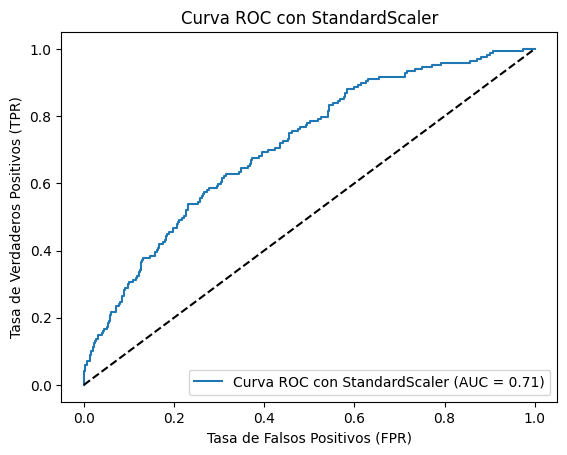

El valor del AUC con StandardScaler es: 0.711609039984547


In [27]:

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Ajustar y transformar el escalador en los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
# Transformar los datos de prueba usando el escalador ajustado en los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)

# Aplicar SMOTE para corregir el desbalance de clases
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


# Crear un modelo de regresión logística
model_scaled = LogisticRegression()

# Entrenar el modelo usando los datos de entrenamiento con SMOTE y escalados
model_scaled.fit(X_train_smote, y_train_smote)

# #### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.

# Realizar predicciones en el conjunto de prueba
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Calcular la matriz de confusión
cm_scaled = confusion_matrix(y_test, y_pred_scaled)
print("Matriz de Confusión con StandardScaler:\n", cm_scaled)

# Calcular la precisión
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("Precisión (Accuracy) con StandardScaler:", accuracy_scaled)

# Calcular el recall
recall_scaled = recall_score(y_test, y_pred_scaled)
print("Recall con StandardScaler:", recall_scaled)

# Calcular la precisión (precision)
precision_scaled = precision_score(y_test, y_pred_scaled)
print("Precisión (Precision) con StandardScaler:", precision_scaled)

# Calcular el F1-score
f1_scaled = f1_score(y_test, y_pred_scaled)
print("F1-score con StandardScaler:", f1_scaled)


# #### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

# Obtener las probabilidades de predicción para la clase positiva (TenYearCHD = 1)
y_pred_proba_scaled = model_scaled.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr_scaled, tpr_scaled, thresholds_scaled = roc_curve(y_test, y_pred_proba_scaled)

# Calcular el AUC (Area Under the Curve)
auc_scaled = roc_auc_score(y_test, y_pred_proba_scaled)

# Graficar la curva ROC
plt.plot(fpr_scaled, tpr_scaled, label='Curva ROC con StandardScaler (AUC = %0.2f)' % auc_scaled)
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC con StandardScaler')
plt.legend(loc='lower right')
plt.show()

print(f"El valor del AUC con StandardScaler es: {auc_scaled}")


### Pinte todas las graficas original SMOTE y SMOTE Scaler

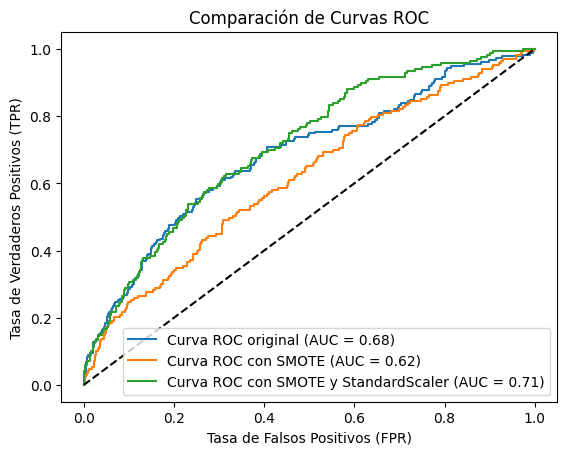

In [28]:
plt.plot(fpr_no_smote, tpr_no_smote, label='Curva ROC original (AUC = %0.2f)' % auc_no_smote)
plt.plot(fpr_smote, tpr_smote, label='Curva ROC con SMOTE (AUC = %0.2f)' % auc_smote)
plt.plot(fpr_scaled, tpr_scaled, label='Curva ROC con SMOTE y StandardScaler (AUC = %0.2f)' % auc_scaled)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparación de Curvas ROC')
plt.legend(loc='lower right')
plt.show()
